In [41]:
import pandas as pd
import numpy as np

In [42]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [43]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [44]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (4, 3)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [45]:
df=pd.read_csv('data_perovskites.csv')

In [46]:
new_data=pd.read_csv('rhombohedral.csv')

In [47]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [48]:
wp1=df.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [49]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [50]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [51]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [52]:
#wp1=wp1[wp1['In literature']==True]

In [53]:
wp1=wp1[wp1['Valence A']!='not balanced']

In [54]:
wp1=wp1[wp1['Valence A']!='element not in BV']

In [55]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
76,AgAsO3,Ag,As,False,1,5,1.28,0.46,tetragonal,1.018842,0.328571
78,AgBO3,Ag,B,False,3,3,0.75,0.27,cubic,0.910347,0.192857
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,0.877336,0.542857
86,AgCrO3,Ag,Cr,False,1,5,1.28,0.49,orthorhombic,1.002670,0.350000
100,AgIrO3,Ag,Ir,False,1,5,1.28,0.57,rhombohedral,0.961952,0.407143
...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,False,1,5,0.89,0.64,cubic,0.793762,0.457143
5319,ZrTiO3,Zr,Ti,False,2,4,0.89,0.61,cubic,0.805609,0.435714
5322,ZrUO3,Zr,U,False,1,5,0.89,0.76,orthorhombic,0.749664,0.542857
5323,ZrVO3,Zr,V,False,1,5,0.89,0.54,cubic,0.834678,0.385714


In [56]:
#wp1['Valence A']=pd.to_numeric(wp1['Valence A'],downcast='float')
#wp1['Valence B']=pd.to_numeric(wp1['Valence B'],downcast='float')

In [57]:
wp1= pd.concat([wp1,pd.get_dummies(wp1['Valence A'])],axis=1)

wp1.drop(['Valence A'],axis=1, inplace=True)

In [58]:
wp1

,Chemical formula,A,B,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5
76,AgAsO3,Ag,As,False,5,1.28,0.46,tetragonal,1.018842,0.328571,1,0,0,0,0
78,AgBO3,Ag,B,False,3,0.75,0.27,cubic,0.910347,0.192857,0,0,1,0,0
81,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0
86,AgCrO3,Ag,Cr,False,5,1.28,0.49,orthorhombic,1.002670,0.350000,1,0,0,0,0
100,AgIrO3,Ag,Ir,False,5,1.28,0.57,rhombohedral,0.961952,0.407143,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0
5319,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0
5322,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0
5323,ZrVO3,Zr,V,False,5,0.89,0.54,cubic,0.834678,0.385714,1,0,0,0,0


In [59]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR']]

In [60]:
wp11=pd.merge(wp1,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [61]:
wp11=pd.merge(wp11,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [62]:
wp11

,Chemical formula,A_x,B_x,In literature,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgAsO3,Ag,As,False,5,1.28,0.46,tetragonal,1.018842,0.328571,1,0,0,0,0,AgAsO3,1.28,0.95,0.46,5.287989,0.923839,AgAsO3,Ag,As,1.93,2.18,2.761453,1.932227
1,AgBO3,Ag,B,False,3,0.75,0.27,cubic,0.910347,0.192857,0,0,1,0,0,AgBO3,0.75,0.95,0.27,3.772168,1.358334,AgBO3,Ag,B,1.93,2.04,2.761453,1.624662
2,AgBiO3,Ag,Bi,False,5,1.28,0.76,rhombohedral,0.877336,0.542857,1,0,0,0,0,AgBiO3,1.28,0.95,0.76,3.376511,0.911822,AgBiO3,Ag,Bi,1.93,2.02,2.761453,2.215655
3,AgCrO3,Ag,Cr,False,5,1.28,0.49,orthorhombic,1.002670,0.350000,1,0,0,0,0,AgCrO3,1.28,0.95,0.49,5.040156,0.921930,AgCrO3,Ag,Cr,1.93,1.66,2.761453,1.960053
4,AgIrO3,Ag,Ir,False,5,1.28,0.57,rhombohedral,0.961952,0.407143,1,0,0,0,0,AgIrO3,1.28,0.95,0.57,4.450725,0.917682,AgIrO3,Ag,Ir,1.93,2.20,2.761453,2.009083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,ZrTaO3,Zr,Ta,False,5,0.89,0.64,cubic,0.793762,0.457143,1,0,0,0,0,ZrTaO3,0.89,0.72,0.64,2.500581,0.892546,ZrTaO3,Zr,Ta,1.33,1.50,2.383420,1.956808
2209,ZrTiO3,Zr,Ti,False,4,0.89,0.61,cubic,0.805609,0.435714,0,1,0,0,0,ZrTiO3,0.89,0.72,0.61,2.614227,0.892978,ZrTiO3,Zr,Ti,1.33,1.54,2.383420,1.927849
2210,ZrUO3,Zr,U,False,5,0.89,0.76,orthorhombic,0.749664,0.542857,1,0,0,0,0,ZrUO3,0.89,0.72,0.76,2.106542,0.892076,ZrUO3,Zr,U,1.33,1.38,2.383420,2.047800
2211,ZrVO3,Zr,V,False,5,0.89,0.54,cubic,0.834678,0.385714,1,0,0,0,0,ZrVO3,0.89,0.72,0.54,2.907544,0.894528,ZrVO3,Zr,V,1.33,1.63,2.383420,1.758039


In [63]:
wp11['New Tolerance Factor']=((wp11['rA at 6 [ang]']/wp11['rA at 12 [ang]'])/3)*((wp11['Radius A [ang]']+1.4)/(wp11['Radius B [ang]']+1.4))*((wp11['Radius B [ang]']+1.4)/1.4*(2**0.5))*((wp11['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [64]:
wp11['EN diff']=(wp11['EN of B']+wp11['EN of A']-6.88)/2

In [65]:
wp11[wp11['Valence A']==1].to_csv('A1.csv')
wp11[wp11['Valence A']==2].to_csv('A2.csv')
wp11[wp11['Valence A']==3].to_csv('A3.csv')
wp11[wp11['Valence A']==4].to_csv('A4.csv')
wp11[wp11['Valence A']==5].to_csv('A5.csv')

KeyError: 'Valence A'

In [ ]:
wp11['Bond length of A'].value_counts()

In [66]:
wp11['Lowest distortion'].value_counts()/210

cubic           6.552381
orthorhombic    3.066667
rhombohedral    0.614286
tetragonal      0.304762
Name: Lowest distortion, dtype: float64

In [67]:
supposed_rhom = wp11[(wp11['tR'] >= 0.9) & (wp11['tR'] <= 1.1)]

In [68]:
supposed_rhom['Lowest distortion'].value_counts()/161

cubic           6.478261
orthorhombic    2.745342
rhombohedral    0.596273
tetragonal      0.217391
Name: Lowest distortion, dtype: float64

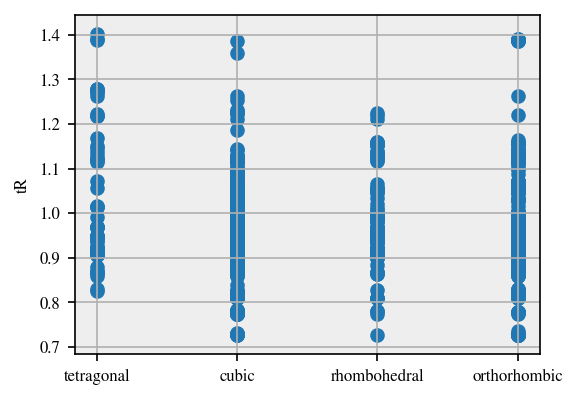

In [69]:
plt.scatter(wp11['Lowest distortion'], wp11['tR'])
#plt.tight_layout()
plt.ylabel('tR')
plt.show()

In [70]:
wp11.replace(['cubic','rhombohedral','tetragonal'],'non ortho',inplace=True)

In [71]:
wp11.replace('orthorhombic','ortho',inplace=True)

In [72]:
wp11['1'].dtypes

dtype('uint8')

In [73]:
wp11['Bond length of A'].unique()

array([2.76145322, 2.18678881, 2.21468451, 1.89152333, 2.94299889,
       2.17834187, 2.5144019 , 2.64807751, 2.5685461 , 2.57778608,
       2.23356286, 2.25810657, 3.30017589, 2.30154769, 2.5508614 ,
       2.53625328, 2.67598779, 2.29064363, 2.2331878 , 2.57181216,
       2.17445047, 2.35873667, 2.64596815, 2.54631216, 2.39236191,
       2.31129496, 3.0257193 , 2.68911876, 2.45321183, 2.50092993,
       2.40138085, 2.47289889, 2.07903552, 2.759925  , 2.29400421,
       2.61763399, 2.39068842, 2.65987713, 2.37071038, 2.64508323,
       3.11226645, 2.33939643, 2.33274871, 2.31680658, 2.36107896,
       2.41702941, 2.08280051, 2.61196546, 2.34236924, 2.76835056,
       2.29367781, 2.55706546, 2.39344353, 2.58292557, 2.27650198,
       2.53196749, 2.41151577, 2.34446699, 2.06233078, 2.10603653,
       2.5664487 , 2.5192614 , 2.37547907, 2.38342002])

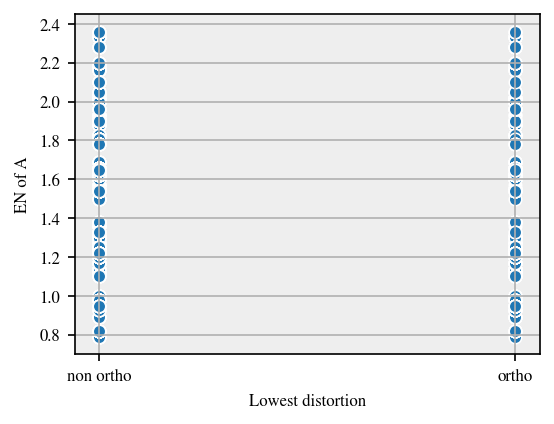

In [74]:
sns.scatterplot(wp11['Lowest distortion'],wp11['EN of A'])

In [75]:
categorical = wp11.select_dtypes(include=[np.object,np.int64])

numeric = wp11.select_dtypes(include=[np.int,np.float32,np.float,np.uint8])
numeric_cols = numeric.columns

In [76]:
categorical

,Chemical formula,A_x,B_x,Valence B,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgAsO3,Ag,As,5,non ortho,AgAsO3,AgAsO3,Ag,As
1,AgBO3,Ag,B,3,non ortho,AgBO3,AgBO3,Ag,B
2,AgBiO3,Ag,Bi,5,non ortho,AgBiO3,AgBiO3,Ag,Bi
3,AgCrO3,Ag,Cr,5,ortho,AgCrO3,AgCrO3,Ag,Cr
4,AgIrO3,Ag,Ir,5,non ortho,AgIrO3,AgIrO3,Ag,Ir
...,...,...,...,...,...,...,...,...,...
2208,ZrTaO3,Zr,Ta,5,non ortho,ZrTaO3,ZrTaO3,Zr,Ta
2209,ZrTiO3,Zr,Ti,4,non ortho,ZrTiO3,ZrTiO3,Zr,Ti
2210,ZrUO3,Zr,U,5,ortho,ZrUO3,ZrUO3,Zr,U
2211,ZrVO3,Zr,V,5,non ortho,ZrVO3,ZrVO3,Zr,V


In [77]:
numeric

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff
0,1.28,0.46,1.018842,0.328571,1,0,0,0,0,1.28,0.95,0.46,5.287989,0.923839,1.93,2.18,2.761453,1.932227,1.813159,-1.385
1,0.75,0.27,0.910347,0.192857,0,0,1,0,0,0.75,0.95,0.27,3.772168,1.358334,1.93,2.04,2.761453,1.624662,1.991553,-1.455
2,1.28,0.76,0.877336,0.542857,1,0,0,0,0,1.28,0.95,0.76,3.376511,0.911822,1.93,2.02,2.761453,2.215655,1.813159,-1.465
3,1.28,0.49,1.002670,0.350000,1,0,0,0,0,1.28,0.95,0.49,5.040156,0.921930,1.93,1.66,2.761453,1.960053,1.813159,-1.645
4,1.28,0.57,0.961952,0.407143,1,0,0,0,0,1.28,0.95,0.57,4.450725,0.917682,1.93,2.20,2.761453,2.009083,1.813159,-1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,0.89,0.64,0.793762,0.457143,1,0,0,0,0,0.89,0.72,0.64,2.500581,0.892546,1.33,1.50,2.383420,1.956808,1.442999,-2.025
2209,0.89,0.61,0.805609,0.435714,0,1,0,0,0,0.89,0.72,0.61,2.614227,0.892978,1.33,1.54,2.383420,1.927849,1.442999,-2.005
2210,0.89,0.76,0.749664,0.542857,1,0,0,0,0,0.89,0.72,0.76,2.106542,0.892076,1.33,1.38,2.383420,2.047800,1.442999,-2.085
2211,0.89,0.54,0.834678,0.385714,1,0,0,0,0,0.89,0.72,0.54,2.907544,0.894528,1.33,1.63,2.383420,1.758039,1.442999,-1.960


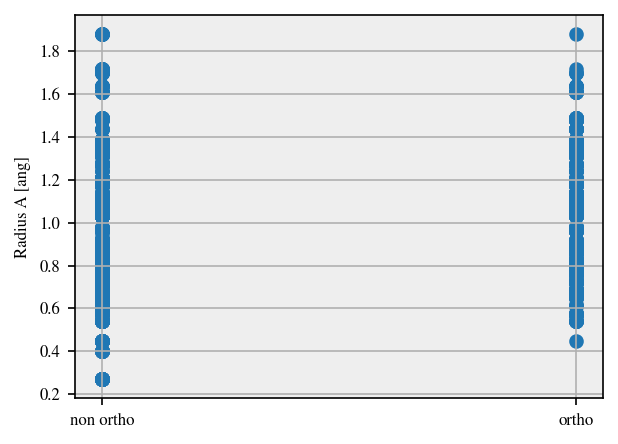

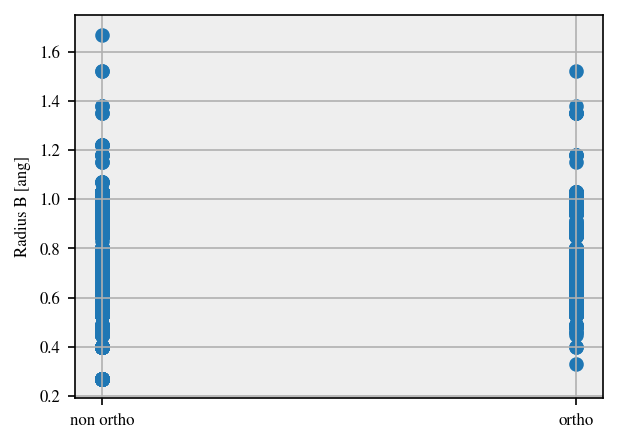

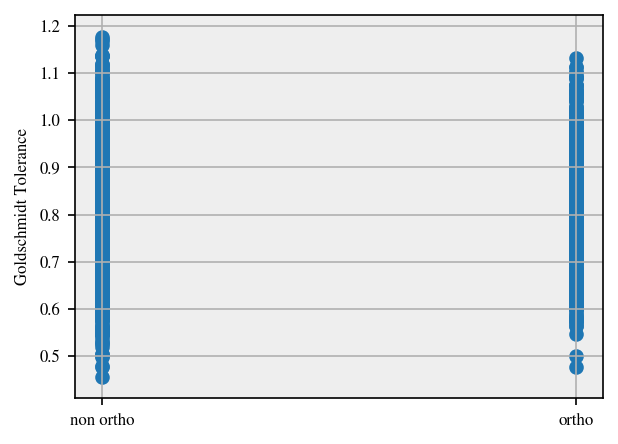

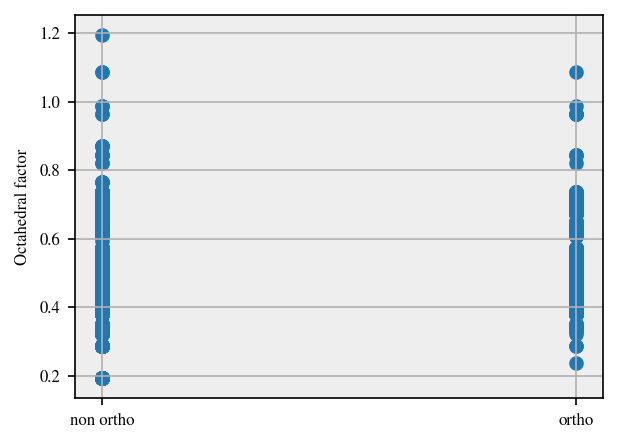

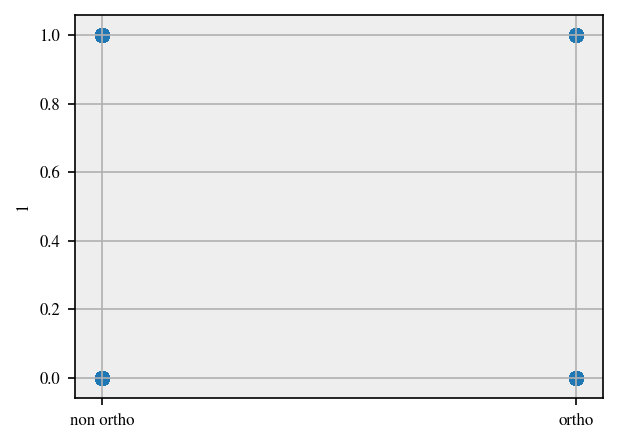

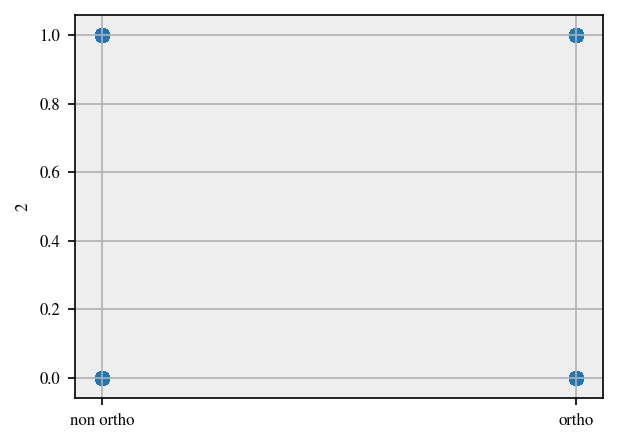

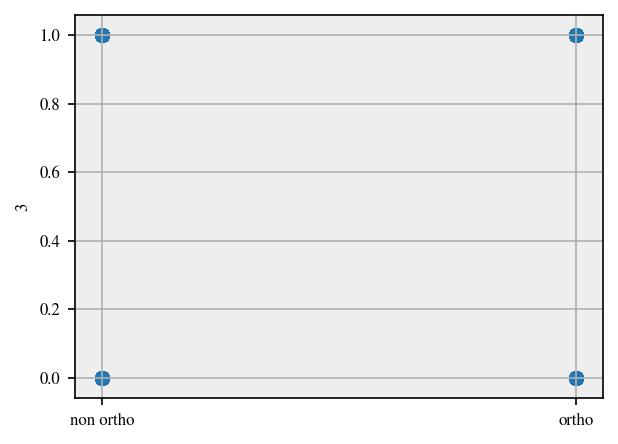

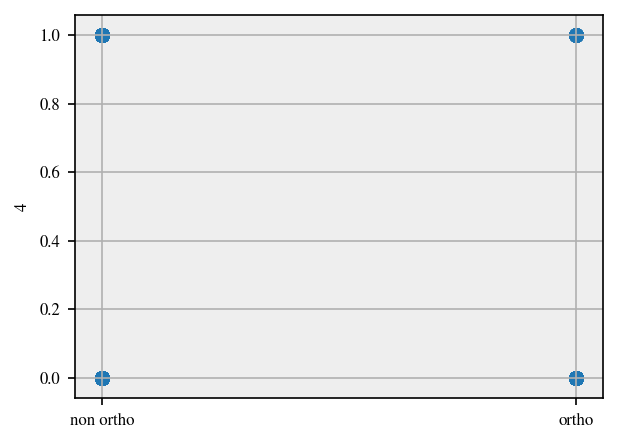

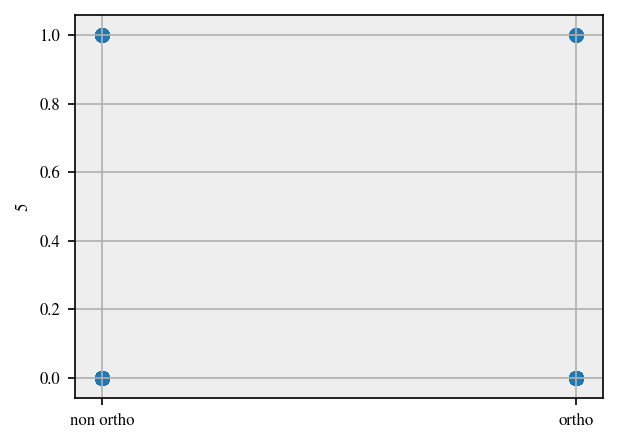

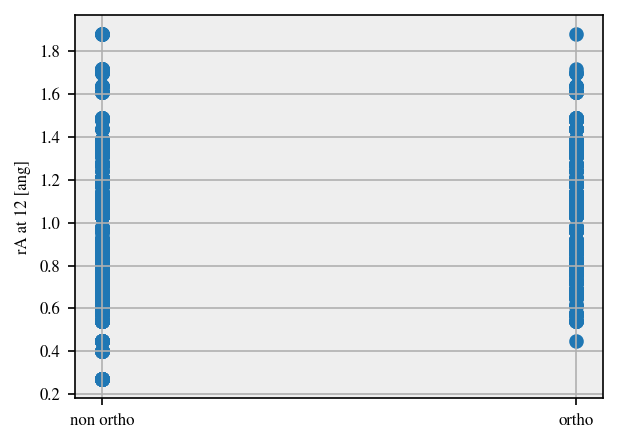

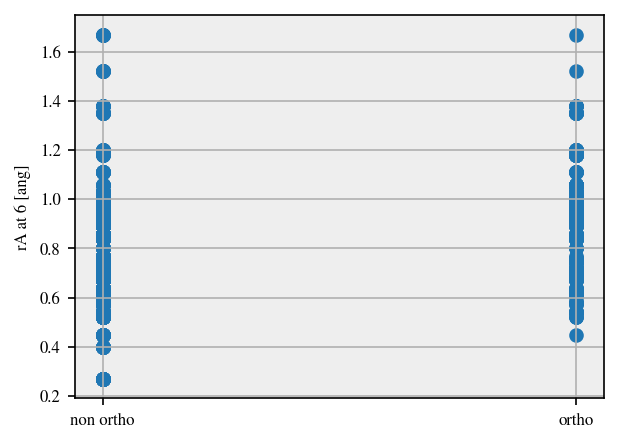

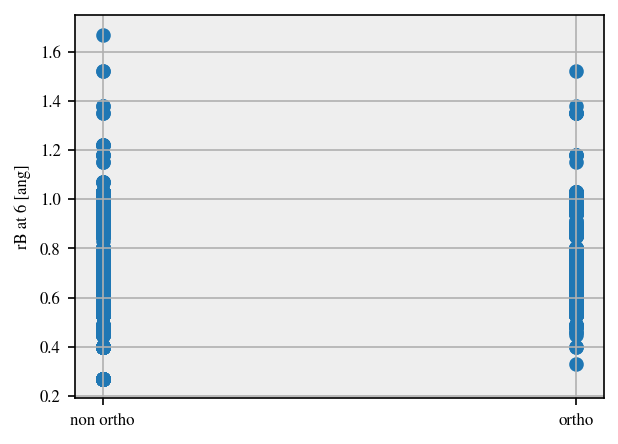

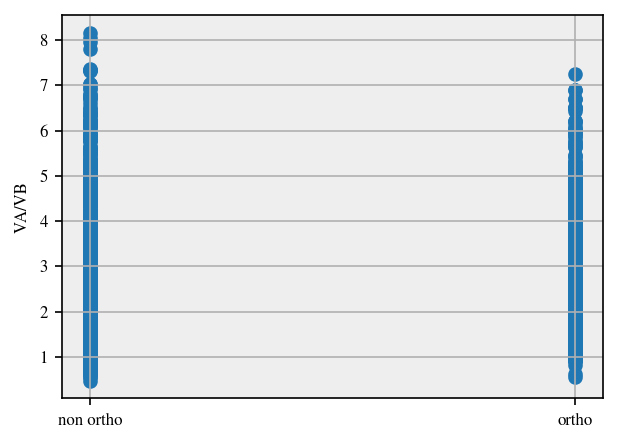

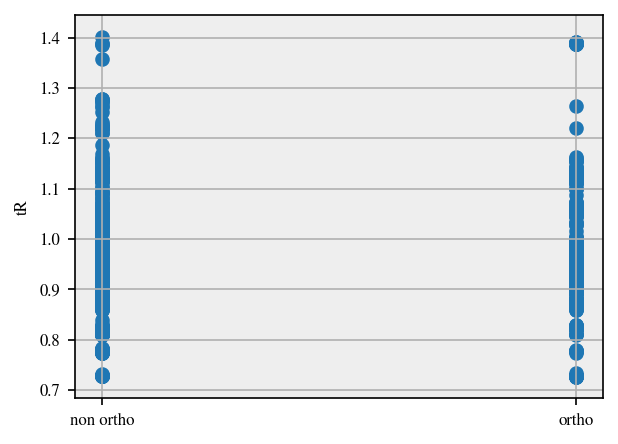

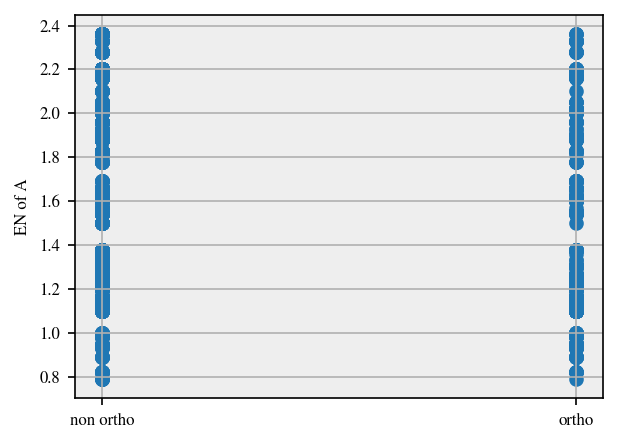

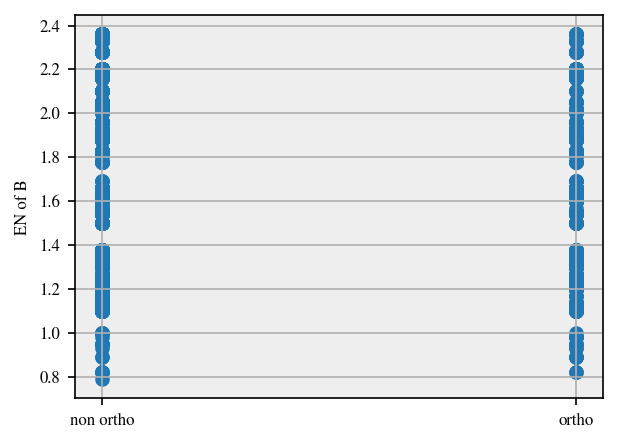

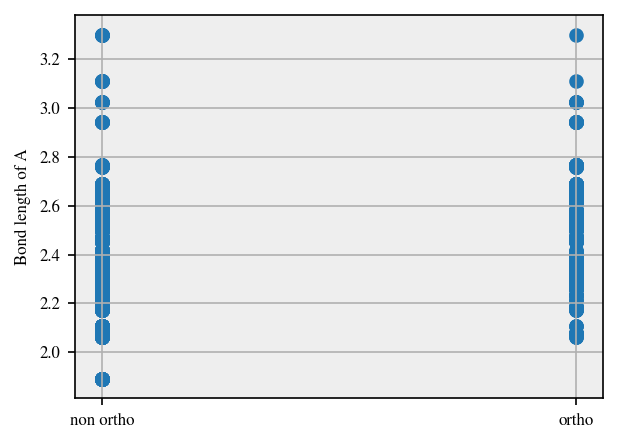

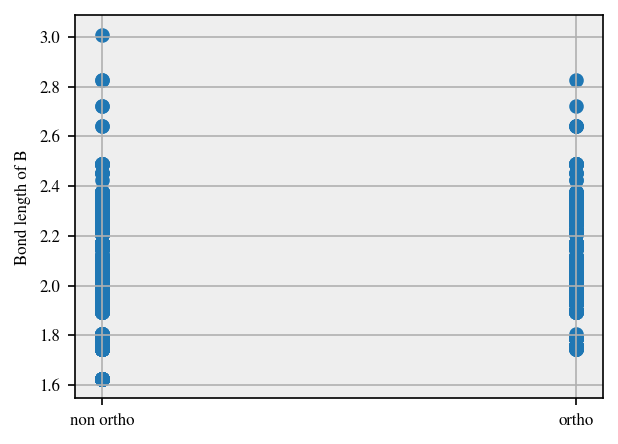

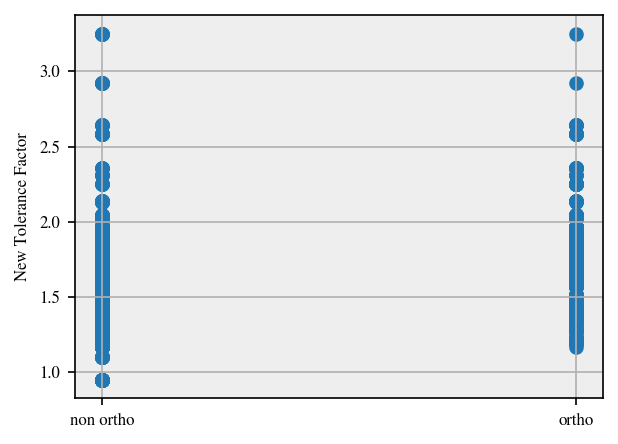

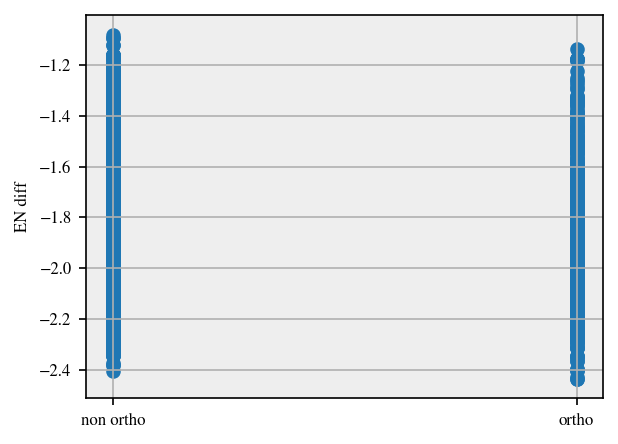

In [78]:
for i in numeric.columns:
    plt.scatter(wp11['Lowest distortion'], wp11[i])
    plt.tight_layout()
    plt.locator_params(axis='x', nbins=2)
    #plt.xlim([0, 1])
    plt.ylabel(i)
    plt.show()

In [79]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff
Radius A [ang],1.00,-0.02,0.85,-0.02,0.10,0.06,-0.07,-0.03,-0.14,1.00,0.93,-0.02,0.83,0.11,-0.62,0.04,0.90,-0.03,0.88,-0.44
Radius B [ang],-0.02,1.00,-0.54,1.00,-0.18,-0.15,0.16,0.12,0.17,-0.02,-0.02,1.00,-0.50,0.01,-0.00,-0.56,-0.03,0.78,-0.02,-0.38
Goldschmidt Tolerance,0.85,-0.54,1.00,-0.54,0.18,0.12,-0.15,-0.07,-0.18,0.85,0.79,-0.54,0.98,0.10,-0.52,0.32,0.77,-0.43,0.75,-0.17
Octahedral factor,-0.02,1.00,-0.54,1.00,-0.18,-0.15,0.16,0.12,0.17,-0.02,-0.02,1.00,-0.50,0.01,-0.00,-0.56,-0.03,0.78,-0.02,-0.38
1,0.10,-0.18,0.18,-0.18,1.00,-0.27,-0.29,-0.09,-0.04,0.10,0.12,-0.18,0.20,0.09,-0.06,0.16,0.14,-0.14,0.15,0.07
2,0.06,-0.15,0.12,-0.15,-0.27,1.00,-0.70,-0.22,-0.09,0.06,-0.05,-0.15,0.11,-0.29,0.04,0.14,-0.04,-0.11,-0.07,0.13
3,-0.07,0.16,-0.15,0.16,-0.29,-0.70,1.00,-0.23,-0.10,-0.07,0.01,0.16,-0.16,0.20,-0.01,-0.18,-0.02,0.15,0.01,-0.13
4,-0.03,0.12,-0.07,0.12,-0.09,-0.22,-0.23,1.00,-0.03,-0.03,-0.01,0.12,-0.07,0.03,-0.03,-0.07,-0.04,0.02,-0.02,-0.07
5,-0.14,0.17,-0.18,0.17,-0.04,-0.09,-0.10,-0.03,1.00,-0.14,-0.11,0.17,-0.13,0.11,0.08,-0.10,-0.06,0.14,-0.08,-0.01
rA at 12 [ang],1.00,-0.02,0.85,-0.02,0.10,0.06,-0.07,-0.03,-0.14,1.00,0.93,-0.02,0.83,0.11,-0.62,0.04,0.90,-0.03,0.88,-0.44


In [132]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [133]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [134]:
test=wp11

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [136]:
#le_target = LabelEncoder()
#test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [137]:
numeric

,Radius A _ang_,Radius B _ang_,Goldschmidt Tolerance,Octahedral factor,1,2,3,4,5,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor,EN diff
0,1.28,0.46,1.018842,0.328571,1,0,0,0,0,1.28,0.95,0.46,5.287989,0.923839,1.93,2.18,2.761453,1.932227,1.813159,-1.385
1,0.75,0.27,0.910347,0.192857,0,0,1,0,0,0.75,0.95,0.27,3.772168,1.358334,1.93,2.04,2.761453,1.624662,1.991553,-1.455
2,1.28,0.76,0.877336,0.542857,1,0,0,0,0,1.28,0.95,0.76,3.376511,0.911822,1.93,2.02,2.761453,2.215655,1.813159,-1.465
3,1.28,0.49,1.002670,0.350000,1,0,0,0,0,1.28,0.95,0.49,5.040156,0.921930,1.93,1.66,2.761453,1.960053,1.813159,-1.645
4,1.28,0.57,0.961952,0.407143,1,0,0,0,0,1.28,0.95,0.57,4.450725,0.917682,1.93,2.20,2.761453,2.009083,1.813159,-1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,0.89,0.64,0.793762,0.457143,1,0,0,0,0,0.89,0.72,0.64,2.500581,0.892546,1.33,1.50,2.383420,1.956808,1.442999,-2.025
2209,0.89,0.61,0.805609,0.435714,0,1,0,0,0,0.89,0.72,0.61,2.614227,0.892978,1.33,1.54,2.383420,1.927849,1.442999,-2.005
2210,0.89,0.76,0.749664,0.542857,1,0,0,0,0,0.89,0.72,0.76,2.106542,0.892076,1.33,1.38,2.383420,2.047800,1.442999,-2.085
2211,0.89,0.54,0.834678,0.385714,1,0,0,0,0,0.89,0.72,0.54,2.907544,0.894528,1.33,1.63,2.383420,1.758039,1.442999,-1.960


In [138]:
X=numeric.drop(['Radius A _ang_','Radius B _ang_','VA/VB','tR','rB at 6 _ang_'],axis=1)
y=wp11['Lowest distortion']

In [139]:
test['Lowest distortion'].value_counts()

0    1569
1     644
Name: Lowest distortion, dtype: int64

In [140]:
categorical['Lowest distortion'].value_counts()

0    1569
1     644
Name: Lowest distortion, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [142]:
train_data = pd.concat([X_train, y_train], axis=1)

In [143]:
train_data['Lowest distortion'].value_counts()

0    1051
1     431
Name: Lowest distortion, dtype: int64

In [144]:
majority= train_data[train_data['Lowest distortion']==0]
minority= train_data[train_data['Lowest distortion']==1]

In [145]:

# upsample minority
min_upsampled = resample(minority,
 replace=True, # sample with replacement
 n_samples=len(majority), # match number in majority class
 random_state=27) # reproducible results

In [146]:
upsampled = pd.concat([min_upsampled,majority])

In [147]:
upsampled['Lowest distortion'].value_counts()

1    1051
0    1051
Name: Lowest distortion, dtype: int64

In [148]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [150]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [151]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## SVM

In [152]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
model2.score(X_new,y_new)

0.7017126546146527

In [154]:
model2.score(X_test,y_test)

0.6593707250341997

In [155]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.6593707250341997

In [156]:
confusion_matrix(preds,y_test)

array([[341,  72],
       [177, 141]], dtype=int64)

In [157]:
y_test.value_counts()

0    518
1    213
Name: Lowest distortion, dtype: int64

In [158]:
pd.Series(preds).value_counts()

0    413
1    318
dtype: int64

In [159]:
# There are 689 elements in class 0.
#So even if all were predicted to be in class 0 the accuracy would be 689/731 which is 94.25%

#Thus accuracy should be greater than 94.25%

#acc=0.9428571428571428
#This is not good as random choosing would give same acc

## Predicting Orthorhombic
#acc=0.6593707250341997
#should get an acc about 70% since that is 518/731


## XGBoost

In [160]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

0.884395813510942

In [161]:
model1.score(X_test,y_test)

0.7975376196990424

In [162]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.7975376196990424

In [163]:
confusion_matrix(preds,y_test)

array([[429,  59],
       [ 89, 154]], dtype=int64)

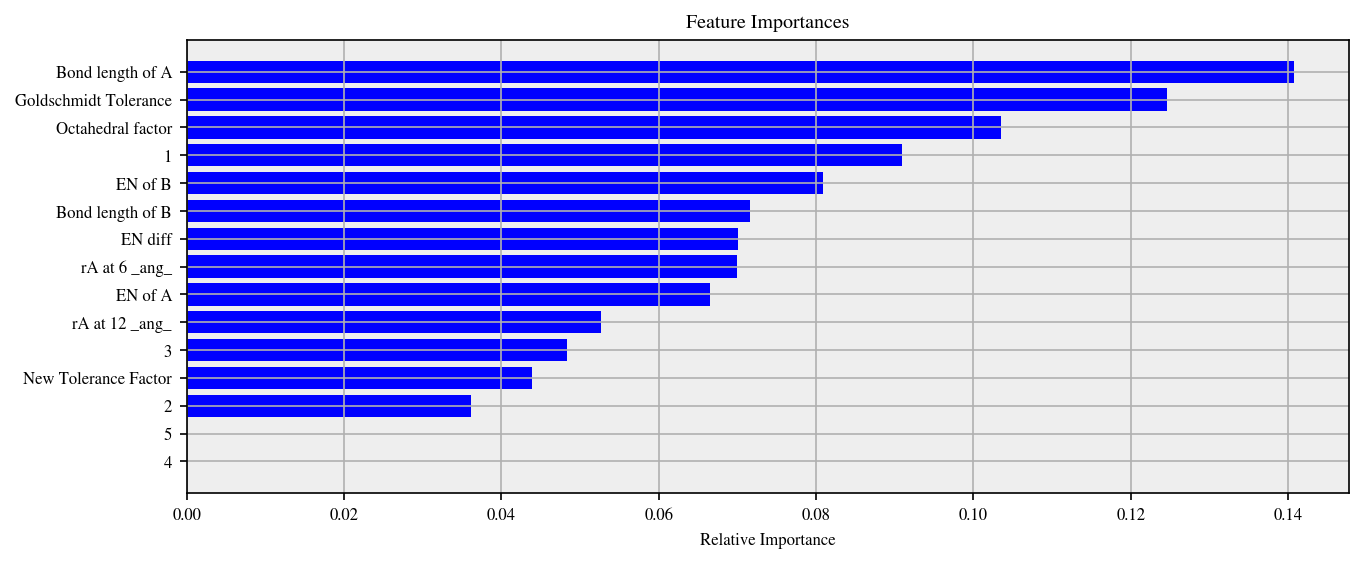

In [164]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [165]:
#for rhombohedral
#acc=0.8857142857142857

## Predicting Orthorhombic
#acc=0.79890560875513
#should get an acc about 70% since that is 518/731



## Decision Tree

In [166]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [167]:
model3.score(X_test,y_test)

0.813953488372093

In [168]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.813953488372093

In [169]:
confusion_matrix(preds,y_test)

array([[461,  79],
       [ 57, 134]], dtype=int64)

In [178]:
y_test.value_counts()

0    518
1    213
Name: Lowest distortion, dtype: int64

In [170]:
pd.Series(preds).value_counts()

0    540
1    191
dtype: int64

In [171]:
#for rhombohedral prediction
#acc=0.9
#for orthorhombic
#acc should be above 518/731
#acc=0.813953488372093

## Random Forest

In [172]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [173]:
model4.score(X_test,y_test)

0.8303693570451436

In [174]:
accuracy_score(preds,y_test)

0.813953488372093

In [175]:
confusion_matrix(preds,y_test)

array([[461,  79],
       [ 57, 134]], dtype=int64)

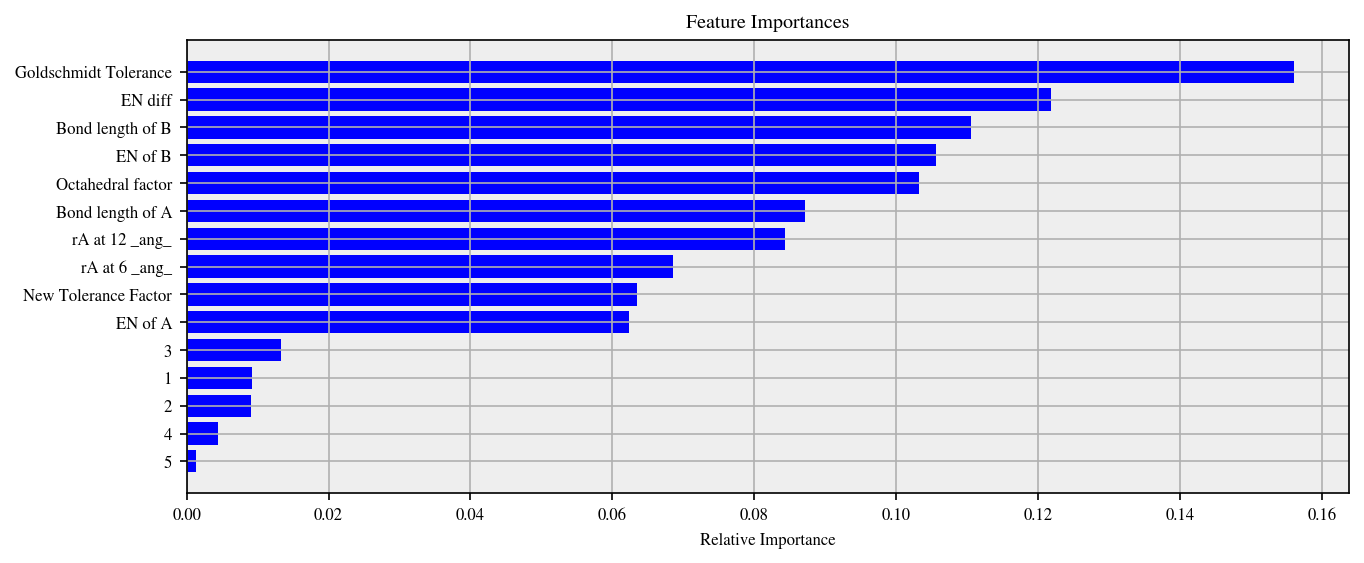

In [176]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [177]:
#acc=0.9
#for ortho vs all
##acc=0.813953488372093